## Spatial degs demonstration
This notebook demonstrate:
1. spatial degs  
using Moran'I test to detect the spatial autocorrelation genes.
2. cluster degs  
with cluster and spatial informations, detecting the difference expression genes between two or more clusters.

In [5]:
import sys
sys.path.append('/zfs-1/zuolulu/spateo-release')
import spateo as st

# 1. spatial degs

Load data 

In [1]:
import anndata
ipath = '/zfs-1/zuolulu/spatialDEG/test/01.single_slice_mouse_brain_adult/mouse_brain_adata_cell_labels_sccCluster.h5ad'
adata = anndata.read_h5ad(ipath)

In [2]:
adata

AnnData object with n_obs × n_vars = 54515 × 25077
    obs: 'area', 'n_counts', 'Size_Factor', 'initial_cell_size', 'scc_e30_s6'
    var: 'use_for_pca'
    uns: 'PCs', '__type', 'explained_variance_ratio_', 'neighbors', 'pca_mean', 'pp', 'scc_e30_s6', 'scc_e30_s6_colors', 'spatial', 'spatial_neighbors'
    obsm: 'X_pca', 'X_spatial', 'bbox', 'spatial'
    layers: 'spliced', 'unspliced'
    obsp: 'connectivities', 'distances', 'spatial_connectivities', 'spatial_distances'

First, we do moran'I test to detect the spatial autocorrelation genes to perform feature selection (in addition to the conventional highly variable genes), then followed by PCA and umap dimension reduction.

In [6]:
m = st.tl.spatial_degs.moran_i(adata)

/home/zuolulu/anaconda3/envs/spateo/lib/python3.9/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(
/home/zuolulu/anaconda3/envs/spateo/lib/python3.9/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(
/home/zuolulu/anaconda3/envs/spateo/lib/python3.9/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(
/home/zuolulu/anaconda3/envs/spateo/lib/python3.9/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.9.

In [7]:
m

moran_i  moran_p_val   moran_z  moran_q_val
0610005C13Rik  1.000000         0.43  0.586049     0.471764
0610006L08Rik  1.000000         0.19  0.182547     0.317008
0610009B22Rik  0.993614         0.28  0.716121     0.388576
0610009O20Rik  0.987027         0.19 -0.862375     0.317008
0610010F05Rik  0.995190         0.04  1.664976     0.113509
...                 ...          ...       ...          ...
mt-Nd3         0.995811         0.07  1.297583     0.168544
mt-Nd4         0.993388         0.01  5.064651     0.040709
mt-Nd4l        1.000000         0.13  0.176622     0.252655
mt-Nd5         0.996461         0.01  5.253479     0.040709
mt-Nd6         0.995046         0.01  4.778495     0.040709

[25077 rows x 4 columns]

Then, we filter genes with pvals>0.05 and qvals>0.05

In [8]:
m_filter = m[(m.moran_p_val < 0.05)&(m.moran_q_val<0.05)].sort_values(by=['moran_i'],ascending=False)
#m_filter.to_csv("/zfs-1/zuolulu/spatialDEG/test/01.single_slice_mouse_brain_adult/mouse_brain_morani_filter.csv")
#import pandas as pd
#m_filter = pd.read_csv("/zfs-1/zuolulu/spatialDEG/test/01.single_slice_mouse_brain_adult/mouse_brain_morani_filter.csv",index_col=0)

In [9]:
m_filter

moran_i  moran_p_val       moran_z  moran_q_val
Gm13078   1.000000         0.01 -1.347781e+00     0.040709
Gm42962   1.000000         0.01 -1.726248e+00     0.040709
Pcdhb9    1.000000         0.01  1.572094e+00     0.040709
Mis12     1.000000         0.01  1.688449e+00     0.040709
Plpp4     1.000000         0.01  1.945390e+00     0.040709
...            ...          ...           ...          ...
Aadac     0.642936         0.01 -9.840499e+00     0.040709
Olfr1333  0.621123         0.01 -6.218709e+00     0.040709
Cyp3a41a  0.592762         0.01 -9.367407e+14     0.040709
Prss56    0.575858         0.01 -7.466081e+01     0.040709
Gm21961   0.572890         0.01 -9.597360e+00     0.040709

[6160 rows x 4 columns]

Visualizing the top five and bottom five genes of moran'I. 

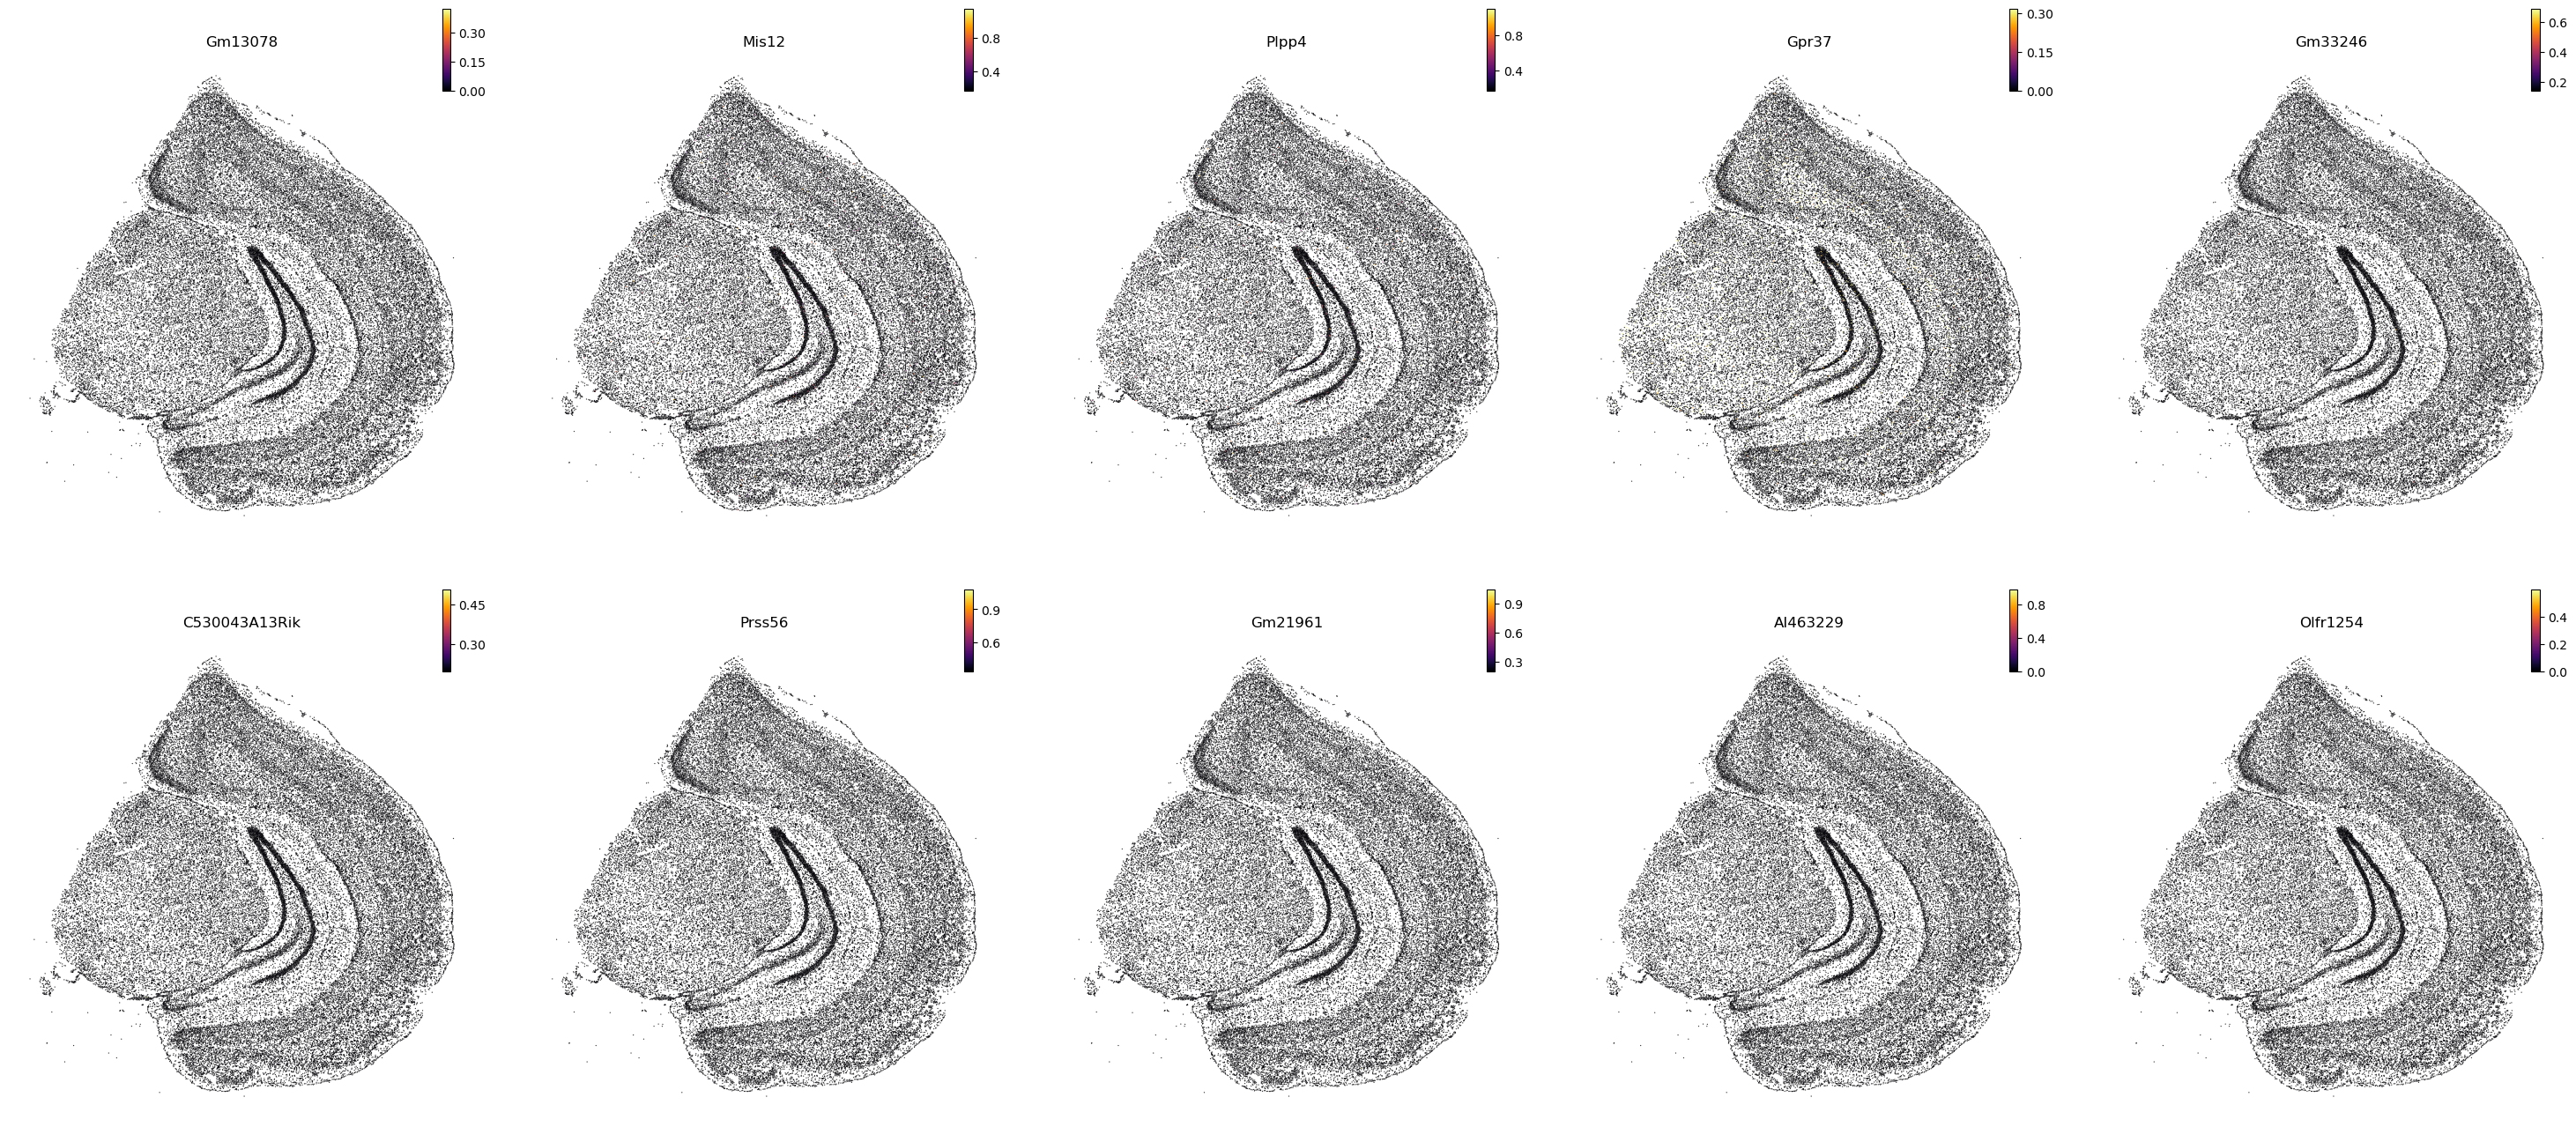

In [26]:
st.pl.space(adata, genes=m_filter.index[0:5].tolist() + m_filter.index[-6:-1].tolist(),
                pointsize=0.05,
                ncols=5,
                show_legend="upper left",
                figsize=(8,8)
               )

# 2 cluster degs

Load data

In [1]:
import anndata
ipath = '/zfs-1/zuolulu/spatialDEG/test/01.single_slice_mouse_brain_adult/mouse_brain_adata_cell_labels_sccCluster.h5ad'
adata = anndata.read_h5ad(ipath)
adata

AnnData object with n_obs × n_vars = 54515 × 25077
    obs: 'area', 'n_counts', 'Size_Factor', 'initial_cell_size', 'scc_e30_s6'
    var: 'use_for_pca'
    uns: 'PCs', '__type', 'explained_variance_ratio_', 'neighbors', 'pca_mean', 'pp', 'scc_e30_s6', 'scc_e30_s6_colors', 'spatial', 'spatial_neighbors'
    obsm: 'X_pca', 'X_spatial', 'bbox', 'spatial'
    layers: 'spliced', 'unspliced'
    obsp: 'connectivities', 'distances', 'spatial_connectivities', 'spatial_distances'

After cluster. we have an anndata object, which column key/name 'scc_e30_s6' identifies the grouping information (for example, clusters that correspond to different cell types) of buckets, adata.obs['scc_e30_s6']. Below we plot its domains.

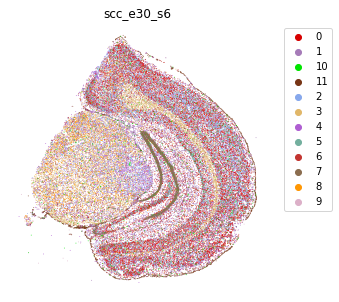

In [11]:
st.pl.space(adata,
                color = 'scc_e30_s6',
                pointsize=0.05,
                ncols=3,
                show_legend="upper left",
                figsize=(8,8)
                )

First,given a test group, `test group=7`, we find marker genes between the test group and other groups together `method = 'multiple'` based on gene expression via Mann-Whitney U test,and we calcute the percentage of buckets expressing the gene in the test group(ratio_expr),the difference between the percentages of buckets expressing the gene in the test group and control groups(diff_ratio_expr),the expression fold change between the test and control groups(log2fc),qval is calculated using Benjamini-Hochberg,in addition,the 1 - Jessen-Shannon distance between the distribution of percentage of cells with expression across all groups to the hypothetical perfect distribution in which only the test group of cells has expression(jsd_adj_score),and Pearson's correlation coefficient between gene vector which actually detected expression in all cells and an ideal marker gene which is only expressed in test_group cells(ppc_score),as well as consin_score.

In [14]:
st.tl.find_cluster_degs(adata,group='scc_e30_s6',test_group='7',control_groups=['0','1','2','3','4','5','6','8','9','10','11'],genes=None,method='multiple')

identifying top markers for each group: 25077it [17:21, 24.08it/s]


gene test_group                        control_group  ratio_expr  \
0      Orai2          7  [0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11]    0.133503   
1     Stxbp6          7  [0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11]    0.189523   
2     Ppfia2          7  [0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11]    0.331757   
3      Ctxn1          7  [0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11]    0.433976   
4      Synpr          7  [0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11]    0.345216   
...      ...        ...                                  ...         ...   
1257   Ckmt1          7  [0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11]    0.119680   
1258    Mapt          7  [0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11]    0.141142   
1259   Apbb1          7  [0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11]    0.139323   
1260   Prkcg          7  [0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11]    0.101128   
1261   Lars2          7  [0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11]    0.857403   

      diff_ratio_expr  person_score  cosine_score  jsd_adj_score    log2fc  \
0            0.118628      0.074421      0.133838      -0.144157  3.003668   
1            0.164526      0.083028      0.139902      -0.060360  2.763586   
2            0.273186      0.109914      0.171260       0.100172  2.568052   
3            0.286543      0.077525      0.070693       0.210140  1.561364   
4            0.303935      0.123204      0.216091       0.143269  2.961234   
...               ...           ...           ...            ...       ...   
1257         0.022647      0.000394      0.003351      -0.093892  0.017451   
1258         0.024174      0.001339      0.003945      -0.026789  0.052639   
1259         0.023610      0.000706      0.003722      -0.031065  0.028351   
1260         0.018158      0.000785      0.003218      -0.156560  0.037526   
1261         0.175179      0.006350      0.010234       0.410628  0.061601   

          pval      qval  
0     0.000000  0.000000  
1     0.000000  0.000000  
2     0.000000  0.000000  
3     0.000000  0.000000  
4     0.000000  0.000000  
...        ...       ...  
1257  0.000611  0.000649  
1258  0.000715  0.000758  
1259  0.001042  0.001101  
1260  0.002370  0.002493  
1261  0.008011  0.008381  

[1262 rows x 11 columns]

plot the marker genes from `st.tl.cluster_degs.find_cluster_degs(method='multiple')`

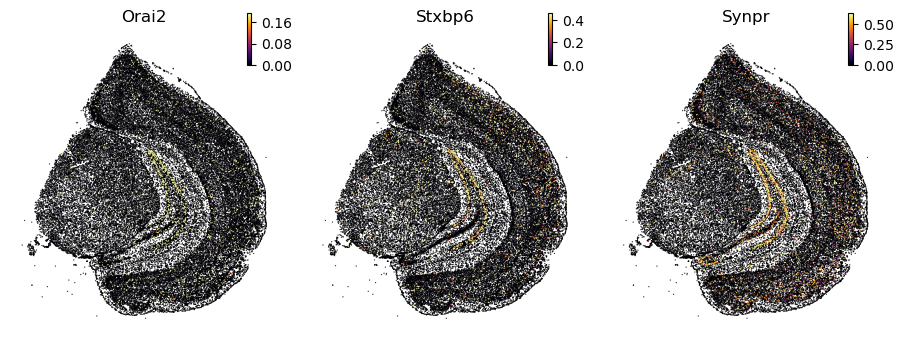

In [29]:
st.pl.space(adata, genes=['Orai2', 'Stxbp6','Synpr'],
                pointsize=0.05,
                ncols=3,
                show_legend="upper left",
                figsize=(4,4)
               )

Then, for the test group, we find marker genes between the test group and other groups one by one `method = 'pairwise'` .

In [3]:
st.tl.find_cluster_degs(adata,group='scc_e30_s6',test_group='7',control_groups=['0','1','2','3','4','5','6','8','9','10','11'],genes=None,method='pairwise')

identifying top markers for each group: 25077it [18:41, 22.37it/s]


gene test_group control_group  ratio_expr  diff_ratio_expr  \
0       Jarid2          7            10    0.734085         0.728514   
1         Dgkh          7             0    0.299745         0.259524   
2          Ubb          7             9    0.723900         0.649018   
3          Ubb          7            10    0.723900         0.711086   
4         Ddx5          7             1    0.358312         0.304669   
...        ...        ...           ...         ...              ...   
12361    Mef2d          7             5    0.161513         0.011858   
12362    Psma6          7             0    0.195708         0.020132   
12363     Cd47          7             8    0.131684         0.021075   
12364    Mprip          7             2    0.115315         0.014000   
12365  Fam168b          7             0    0.100764         0.013445   

       person_score  cosine_score  jsd_adj_score    log2fc      pval      qval  
0         -0.001590      0.144153       0.396673  5.754546  0.000000  0.000000  
1          0.252600      0.272914       0.106577  3.018545  0.000000  0.000000  
2          0.052781      0.217388       0.380147  2.556825  0.000000  0.000000  
3          0.044192      0.221904       0.380147  4.448985  0.000000  0.000000  
4          0.037125      0.134700       0.187304  1.941122  0.000000  0.000000  
...             ...           ...            ...       ...       ...       ...  
12361      0.044970      0.061224      -0.122809  0.395582  0.044691  0.048143  
12362      0.011109      0.025902      -0.012307  0.052674  0.045019  0.048489  
12363      0.007300      0.038178      -0.097992  0.033432  0.045108  0.048582  
12364      0.015772      0.030010      -0.203424  0.176340  0.045615  0.049117  
12365      0.007674      0.018281      -0.273628  0.064285  0.046402  0.049954  

[12366 rows x 11 columns]

Plot the marker genes from `st.tl.cluster_degs.find_cluster_degs(method='pairwise')`

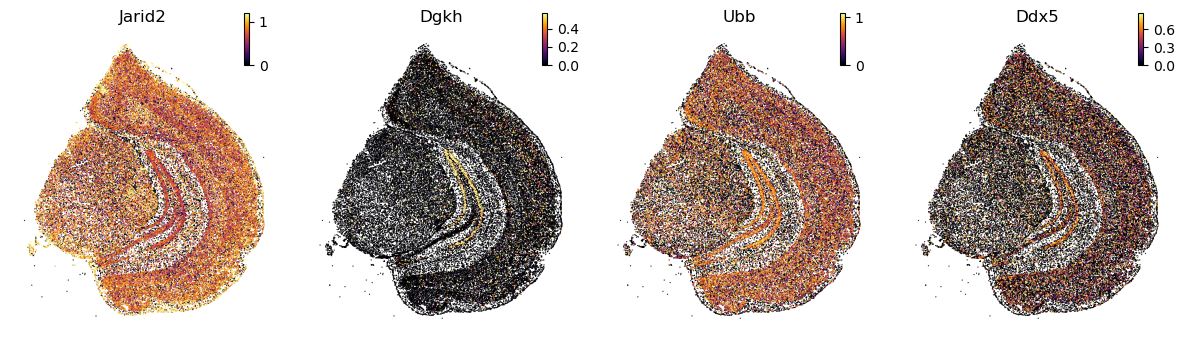

In [30]:
st.pl.space(adata, genes=['Jarid2', 'Dgkh','Ubb','Ddx5'],
                pointsize=0.05,
                ncols=4,
                show_legend="upper left",
                figsize=(4,4)
               )

Second, we find markers for all groups, and return the result in adata object.

In [7]:
adata_marker = st.tl.find_all_cluster_degs(adata,group='scc_e30_s6',genes=None)

identifying top markers for each group: 25077it [19:18, 21.65it/s]
identifying top markers for each group: 25077it [17:30, 23.87it/s]
identifying top markers for each group: 25077it [17:15, 24.23it/s]
identifying top markers for each group: 25077it [17:26, 23.96it/s]
identifying top markers for each group: 25077it [18:17, 22.85it/s]
identifying top markers for each group: 25077it [17:28, 23.92it/s]
identifying top markers for each group: 25077it [17:20, 24.11it/s]
identifying top markers for each group: 25077it [21:01, 19.88it/s]
identifying top markers for each group: 25077it [18:36, 22.46it/s]
identifying top markers for each group: 25077it [18:24, 22.71it/s]
identifying top markers for each group: 25077it [18:11, 22.97it/s]
identifying top markers for each group: 25077it [16:33, 25.24it/s]


Now, we consider the spatial information, given a test group, test group = '7', and then use knn method to search the neighbour groups in spatial space for the test group(test group='5'), do a differential expression analysis result between the test group and neighbor groups.

In [22]:
adata_marker

AnnData object with n_obs × n_vars = 54515 × 25077
    obs: 'area', 'n_counts', 'Size_Factor', 'initial_cell_size', 'scc_e30_s6'
    var: 'use_for_pca'
    uns: 'PCs', '__type', 'explained_variance_ratio_', 'neighbors', 'pca_mean', 'pp', 'scc_e30_s6', 'scc_e30_s6_colors', 'spatial', 'spatial_neighbors', 'cluster_markers'
    obsm: 'X_pca', 'X_spatial', 'bbox', 'spatial'
    layers: 'spliced', 'unspliced'
    obsp: 'connectivities', 'distances', 'spatial_connectivities', 'spatial_distances'

In [16]:
adata_marker.write_h5ad('/zfs-1/zuolulu/spatialDEG/test/01.single_slice_mouse_brain_adult/mouse_brain_adata_cell_labels_sccCluster_deg.h5ad')

In [9]:
st.tl.find_spatial_cluster_degs(test_group='0',adata=adata,x=None,y=None,group='scc_e30_s6')

identifying top markers for each group: 25077it [17:59, 23.22it/s]


gene test_group           control_group  ratio_expr  diff_ratio_expr  \
0     Ndufa2          0  [1, 10, 2, 4, 5, 6, 9]    0.309784         0.182258   
1     Ndufa6          0  [1, 10, 2, 4, 5, 6, 9]    0.307179         0.184869   
2     Ndufa5          0  [1, 10, 2, 4, 5, 6, 9]    0.316036         0.187702   
3     Ndufa4          0  [1, 10, 2, 4, 5, 6, 9]    0.557778         0.325299   
4     Ndufa3          0  [1, 10, 2, 4, 5, 6, 9]    0.318433         0.191931   
...      ...        ...                     ...         ...              ...   
1152   Tanc2          0  [1, 10, 2, 4, 5, 6, 9]    0.114515         0.020927   
1153   Nrcam          0  [1, 10, 2, 4, 5, 6, 9]    0.107534         0.018355   
1154   Strbp          0  [1, 10, 2, 4, 5, 6, 9]    0.129832         0.016216   
1155  Mycbp2          0  [1, 10, 2, 4, 5, 6, 9]    0.101803         0.012717   
1156    Cdk8          0  [1, 10, 2, 4, 5, 6, 9]    0.942690         0.192807   

      person_score  cosine_score  jsd_adj_score    log2fc          pval  \
0         0.054180      0.160763       0.505740  1.170527  0.000000e+00   
1         0.049236      0.157088       0.508608  1.165078  0.000000e+00   
2         0.063128      0.164168       0.511832  1.174219  0.000000e+00   
3         0.108412      0.229364       0.615676  1.197680  0.000000e+00   
4         0.046230      0.163113       0.516456  1.198737  0.000000e+00   
...            ...           ...            ...       ...           ...   
1152      0.010430      0.035017       0.169335  0.124737  1.539614e-08   
1153      0.003220      0.030053       0.148777  0.039894  7.431095e-07   
1154      0.002089      0.032034       0.203829  0.005484  1.654251e-04   
1155     -0.000035      0.027758       0.128067  0.035459  5.257058e-04   
1156      0.001774      0.109105       0.618834  0.185885  9.848730e-03   

              qval  
0     0.000000e+00  
1     0.000000e+00  
2     0.000000e+00  
3     0.000000e+00  
4     0.000000e+00  
...            ...  
1152  1.569700e-08  
1153  7.563456e-07  
1154  1.672511e-04  
1155  5.305694e-04  
1156  9.906518e-03  

[1157 rows x 11 columns]

Plot the marker genes from `st.tl.find_spatial_cluster_degs()`

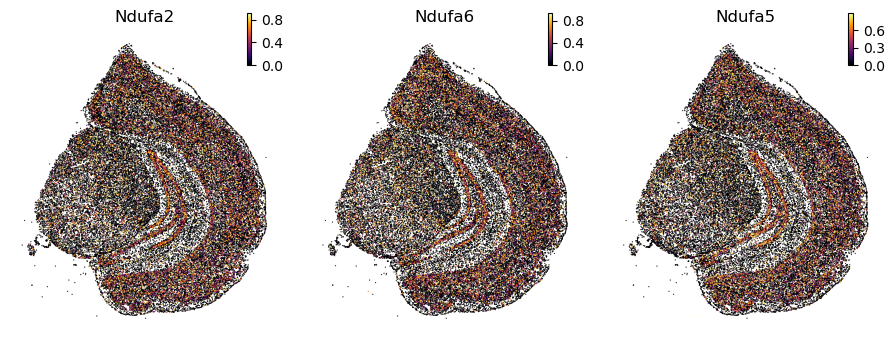

In [31]:
st.pl.space(adata, genes=['Ndufa2', 'Ndufa6','Ndufa5'],
                pointsize=0.05,
                ncols=3,
                show_legend="upper left",
                figsize=(4,4)
               )